##                                                CUSTOMER SEGMENTATION
It is one of the most popular application of unsupervised learning that we are going to do here. In Customer Segmentaion we divide customer into groups based on different characteristics like age,gender wealth,spending habits etc... so that specialized marketing can be done for each group of customers.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans

#### Loading and Visualizing Dataset
Here we will try to get an insight on the dataset.                    
Dataset contains the following features: CustomerID , Gender, Age, Annual Income in 1000$, Spending Scores betwween 1 to 100.

In [190]:
#reading data from csv file
df  = pd.read_csv("Mall_Customers.csv")
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [191]:
#shape of dataframe
df.shape

(200, 5)

In [192]:
#cheacking null values of each column of dataframe
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [193]:
#Looking at more information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Visualizing the Dataset
Here we will look more deeper into the dataset by plotting various graphs

C:\Users\wwwpa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


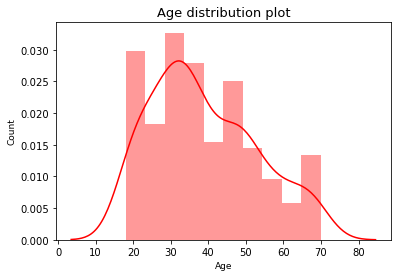

In [194]:
# distribution plot for 'Age'
sns.distplot(df['Age'],color= 'red',bins=10)
plt.title('Age distribution plot', fontsize = 13)
plt.xlabel('Age', fontsize = 9)
plt.ylabel('Count', fontsize = 9)
plt.show()

C:\Users\wwwpa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


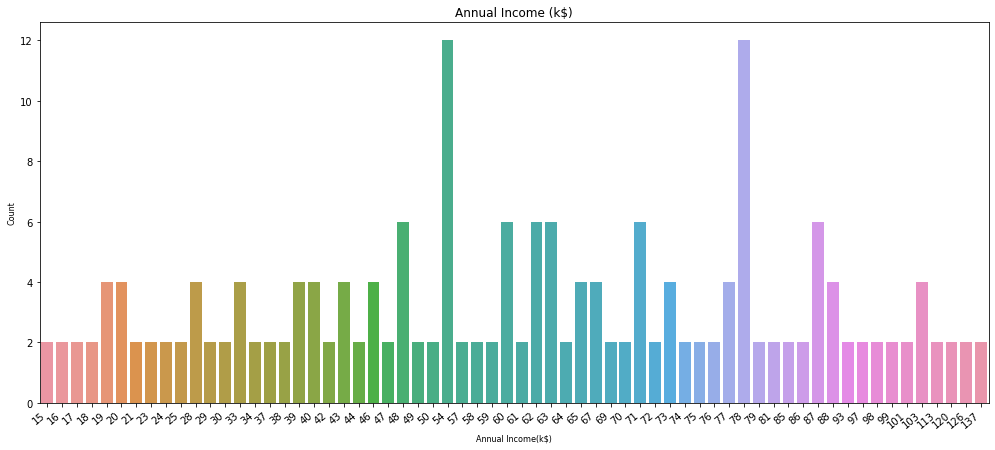

In [195]:
# count plot for 'Annual Income'
plt.figure(figsize=(17,7))
ax = sns.countplot(df['Annual Income (k$)'])
plt.title('Annual Income (k$)', fontsize = 12)
plt.xlabel('Annual Income(k$)', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

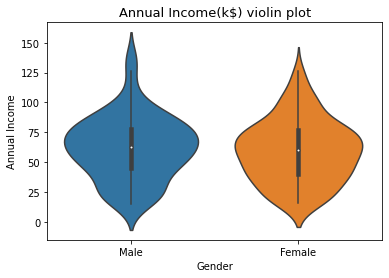

In [196]:
# violin plot for 'Annual Income'
ax = sns.violinplot(y = 'Annual Income (k$)' , x = 'Gender' , data = df)
plt.title('Annual Income(k$) violin plot', fontsize = 13)
plt.xlabel('Gender', fontsize = 10)
plt.ylabel('Annual Income', fontsize = 10)

plt.show()

C:\Users\wwwpa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


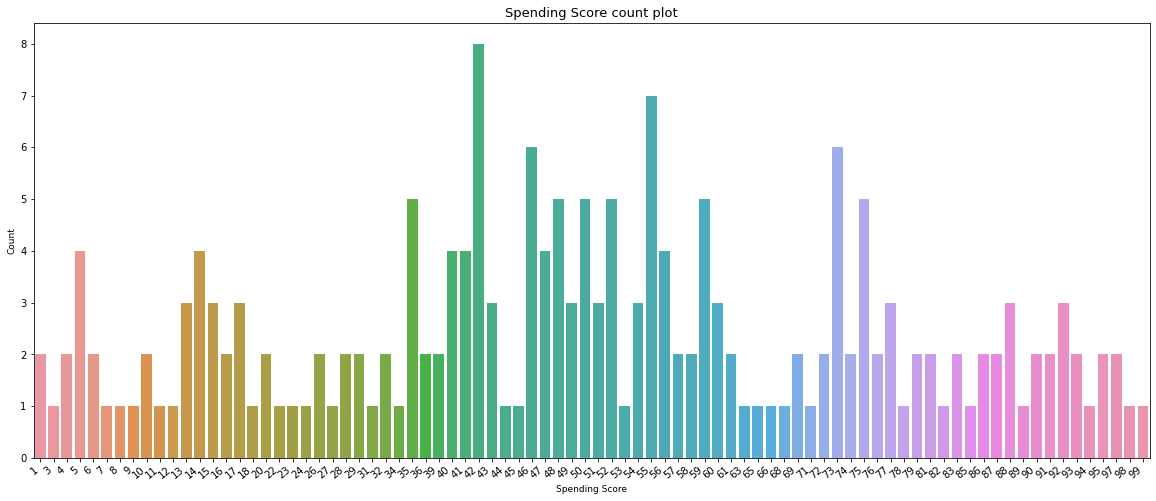

In [197]:
# count plot for 'Spending Score'
plt.figure(figsize=(20,8))
ax = sns.countplot(df['Spending Score (1-100)'])
plt.title('Spending Score count plot', fontsize = 13)
plt.xlabel('Spending Score', fontsize =9)
plt.ylabel('Count', fontsize = 9)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

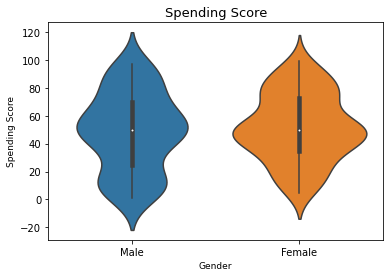

In [198]:
# violin plot for 'Spending Score'
sns.violinplot(y = 'Spending Score (1-100)' , x = 'Gender' , data = df)
plt.title('Spending Score', fontsize = 13)
plt.xlabel('Gender', fontsize = 9)
plt.ylabel('Spending Score', fontsize = 9)
plt.show()


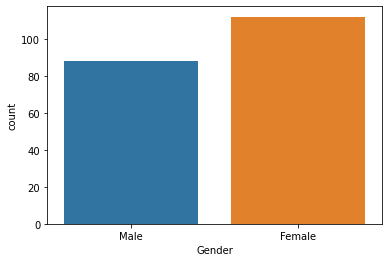

In [199]:
#count of each gender
sns.countplot(x='Gender',data=df)
plt.show()


[Text(0.5, 0, 'CustomerID'),
 Text(1.5, 0, 'Age'),
 Text(2.5, 0, 'Annual Income (k$)'),
 Text(3.5, 0, 'Spending Score (1-100)')]

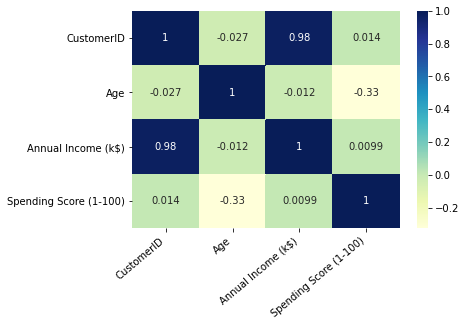

In [200]:
# heatmap of correlation table(correlation b/w diffrent attributes)
ax = sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

## Using above information for Customer Segmentation

#### Visulaising  clusters formed by 'Annual Income' and 'Spending Scores' using scatter plot

C:\Users\wwwpa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


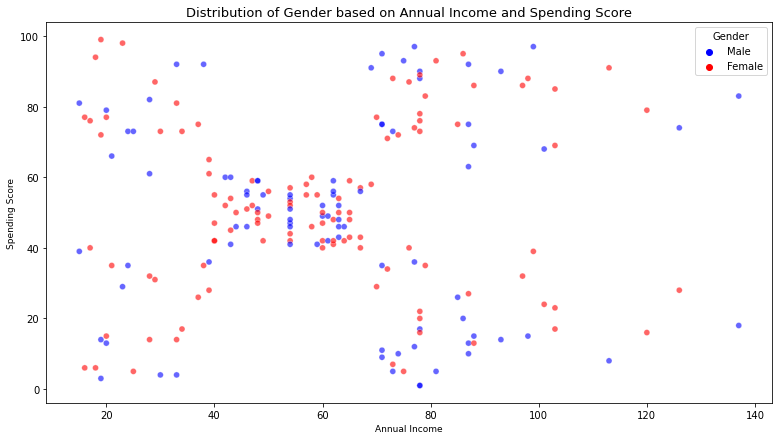

In [201]:
plt.figure(figsize=(13,7))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'],hue=df['Gender'],
                palette= ['blue','red'] ,alpha=0.6)
plt.title('Distribution of Gender based on Annual Income and Spending Score', fontsize = 13)
plt.xlabel('Annual Income', fontsize = 9)
plt.ylabel('Spending Score', fontsize = 9)

plt.show()

C:\Users\wwwpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method')

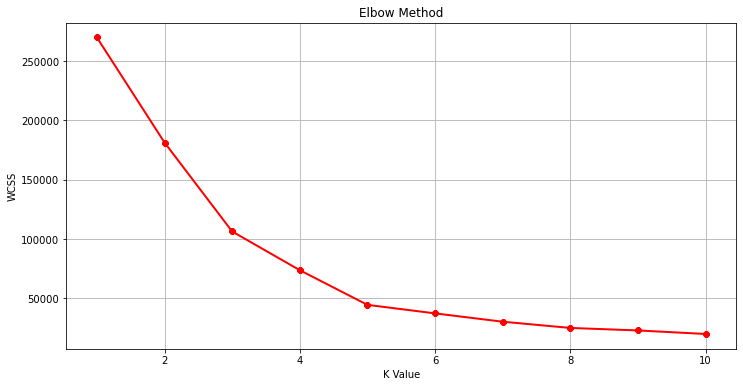

In [202]:
spenditure = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(spenditure)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title('Elbow Method')


Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow.

The optimal K value is found to be 5 using the elbow method.

#### 3D plot to visualize the Spending Score of the customers with their Annual Income

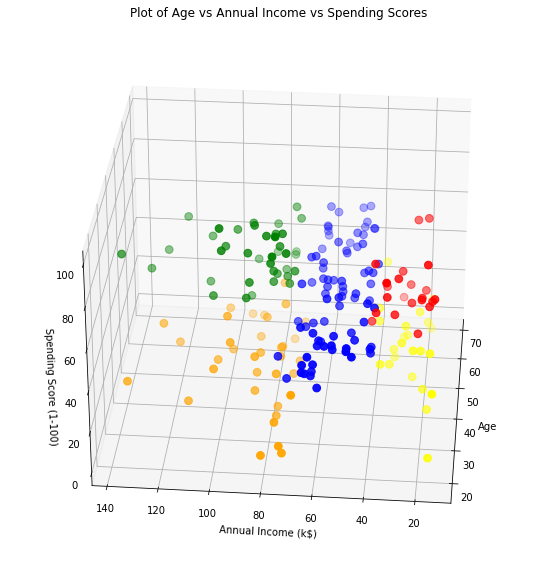

In [203]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(spenditure)
df["label"] = clusters


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='red', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='blue', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='yellow', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Plot of Age vs Annual Income vs Spending Scores')
plt.show()


## Conclusion
K means clustering is one of the most popular clustering algorithms and is great for visualozing and understanding the dataset. The goal of K means is to group data points into distinct non-overlapping subgroups. One of the major application of K means clustering is segmentation of customers to get a better understanding of them which in turn could be used to increase the revenue of the company.